<a href="https://colab.research.google.com/github/oodlbee/drug_prediction/blob/master/NN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Решение задачи регрессии с помощью нейронных сетей

Определение стоимости недвижимости из набора данных Boston Housing

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.


In [16]:
!pip install rdkit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors
from sklearn.preprocessing import FunctionTransformer
import seaborn as sns
#from scipy.misc import toimage
%matplotlib inline

## Подготовка данных

**Загружаем данные**

In [5]:
all_data = pd.read_excel('35000.xlsx')
all_data = all_data.drop(columns=["Unnamed: 0"])

In [14]:
all_data.shape

(36377, 3)

In [6]:
all_data.head(1)

,Title,IC50,SMILES
0,CHEMBL2206459,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...


In [12]:
sum(all_data.SMILES.duplicated())

117

In [15]:
all_data = all_data.drop(all_data[all_data.SMILES.duplicated()].index)

In [18]:
all_data = all_data.drop(all_data[all_data['IC50'] > 500].index)

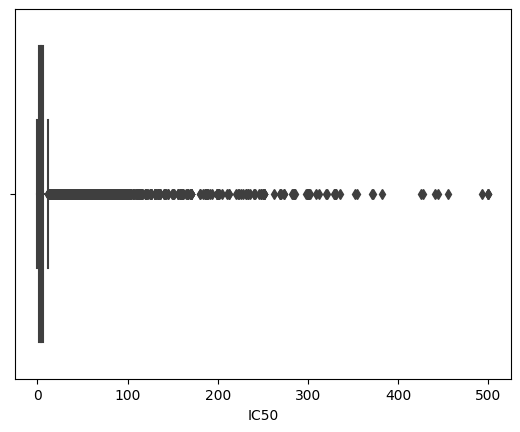

In [19]:
sns.boxplot(all_data, x="IC50")
plt.show()

In [20]:
# all_data = pd.read_csv('processed_df.csv')
# all_data = all_data.drop(all_data[all_data['CC50-MDCK, mmg/ml'] == 300].index)
X = all_data[["SMILES"]]
y = all_data["IC50"]
# y2= all_data["IC50, mmg/ml"]


In [ ]:
# all_data[all_data['CC50-MDCK, mmg/ml'] == 300].shape

(0, 58)

In [26]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36237 entries, 0 to 36352
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   36237 non-null  object 
 1   IC50    36237 non-null  float64
 2   SMILES  36237 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [21]:
all_data.head()

,Title,IC50,SMILES
0,CHEMBL2206459,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,CHEMBL3818159,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,CHEMBL1956716,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,CHEMBL1956715,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,CHEMBL4444029,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...


In [22]:
all_data.shape

(36237, 3)

In [23]:
X.head()

,SMILES
0,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...


In [24]:
from rdkit import Chem
def RDKfingerPrint(mol_smi, **kwargs):
    mol = Chem.MolFromSmiles(mol_smi)
    desc_vec = np.zeros((1,), dtype=int)
    DataStructs.ConvertToNumpyArray(AllChem.RDKFingerprint(mol, **kwargs), desc_vec)
    return desc_vec

In [27]:
fp =[]
for semp in all_data['SMILES']:
  fp.append(RDKfingerPrint(semp, maxPath=5))

fp = pd.DataFrame(fp)


X = fp#pd.merge(X, fp, left_index = True, right_index=True)

[10:19:24] Conflicting single bond directions around double bond at index 55.
[10:19:24]   BondStereo set to STEREONONE and single bond directions set to NONE.
[10:19:56] Conflicting single bond directions around double bond at index 7.
[10:19:56]   BondStereo set to STEREONONE and single bond directions set to NONE.


In [28]:
#X = X.drop(columns=  ["SMILES"])

In [29]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Просмотр данных**

In [59]:
min_y = y_train.min()
max_y = y_train.max()

In [60]:
print(y_train.min())
print(y_train.max())

9.97e-06
500.0


## Создаем нейронную сеть



In [61]:
model = Sequential()
model.add(Dense(987, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.1))
#model.add(Dense(100, activation='softmax'))
model.add(Dense(1))#, activation='sigmoid')) # sigmoid, т.к. данные от 0 до 1

In [62]:
print(model.summary()) # архитектура нашей модели

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 987)               2022363   
                                                                 
 dense_9 (Dense)             (None, 64)                63232     
                                                                 
 dense_10 (Dense)            (None, 1000)              65000     
                                                                 
 dense_11 (Dense)            (None, 64)                64064     
                                                                 
 dense_12 (Dense)            (None, 1000)              65000     
                                                                 
 dense_13 (Dense)            (None, 500)               500500    
                                                                 
 dense_14 (Dense)            (None, 64)               

**Компилируем сеть**

Функция ошибки - среднеквадратичное отклонение. Метрика - среднее абсолютное отклонение.

In [63]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## Обучаем нейронную сеть



In [74]:
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
history = model.fit(x_train,
                    y_train,
                    epochs=50,
                    validation_split=0.1,
                    verbose=2)

Epoch 1/50
765/765 - 3s - loss: 141.8907 - mae: 3.7289 - val_loss: 272.5959 - val_mae: 4.5024 - 3s/epoch - 4ms/step
Epoch 2/50
765/765 - 3s - loss: 135.0419 - mae: 3.6947 - val_loss: 198.6111 - val_mae: 4.1847 - 3s/epoch - 4ms/step
Epoch 3/50
765/765 - 3s - loss: 144.9891 - mae: 3.7133 - val_loss: 208.7951 - val_mae: 4.2482 - 3s/epoch - 4ms/step
Epoch 4/50
765/765 - 3s - loss: 134.2787 - mae: 3.6709 - val_loss: 198.6085 - val_mae: 4.2743 - 3s/epoch - 4ms/step
Epoch 5/50
765/765 - 3s - loss: 136.8853 - mae: 3.7047 - val_loss: 230.5180 - val_mae: 4.7356 - 3s/epoch - 4ms/step
Epoch 6/50
765/765 - 3s - loss: 137.3413 - mae: 3.7099 - val_loss: 203.2750 - val_mae: 4.3467 - 3s/epoch - 4ms/step
Epoch 7/50
765/765 - 3s - loss: 136.2943 - mae: 3.6742 - val_loss: 217.4838 - val_mae: 4.2634 - 3s/epoch - 4ms/step
Epoch 8/50
765/765 - 3s - loss: 130.5720 - mae: 3.6422 - val_loss: 182.0080 - val_mae: 4.1645 - 3s/epoch - 4ms/step
Epoch 9/50
765/765 - 3s - loss: 130.2863 - mae: 3.6420 - val_loss: 169.9

In [82]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
x_test = np.asarray(x_test).astype(np.float32)
pred = model.predict(x_test).flatten()

284/284 [==============================] - 1s 3ms/step


In [76]:
pred.shape, x_test.shape, y_test.shape

((9060,), (9060, 2048), (9060,))

In [77]:
d = pred - y_test
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Результаты работы модели на тесте:")
print("MAE:",mae_f)
print("R-Squared:", r2_f)

Результаты работы модели на тесте:
MAE: 4.924167221471412
R-Squared: 0.805016380381706


In [78]:
x_train = np.asarray(x_train).astype(np.float32)
pred = model.predict(x_train).flatten()
d = pred - y_train
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Результаты работы модели на трейне:")
print("MAE:",mae_f)
print("R-Squared:", r2_f)

850/850 [==============================] - 2s 2ms/step
Результаты работы модели на трейне:
MAE: 2.6139019
R-Squared: 0.855184418223191


## Визуализация качества обучения

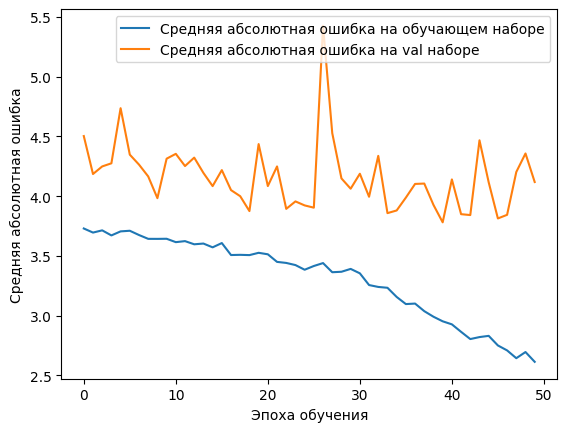

In [79]:
# Считаем графики ошибки
plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на val наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

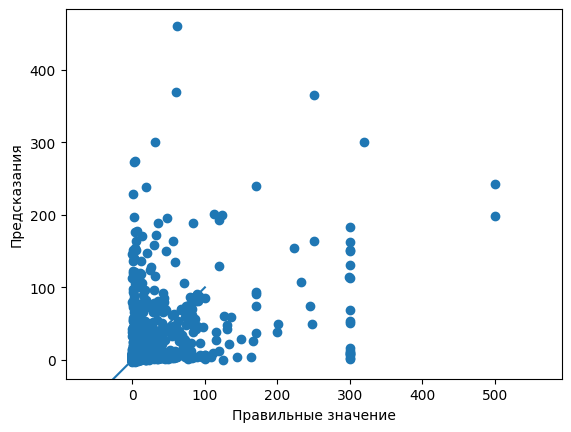

In [84]:
# Разброс предсказаний может показать перекос, если есть
plt.scatter(y_test, pred)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

**Печатаем примеры результатов**

Гистограмма ошибок

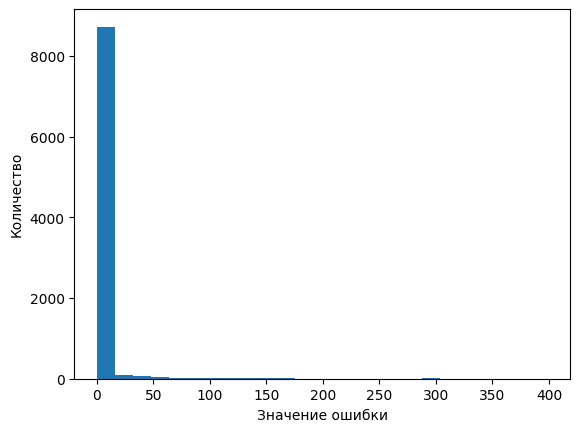

In [83]:
#Разность предсказанного и правильного ответа
error = pred - y_test

#Построение гистограммы
plt.hist(abs(error), bins = 25)
plt.xlabel("Значение ошибки")
plt.ylabel("Количество")
plt.show()